In [170]:
import numpy as np #lineer cebir kütüphanesi
import pandas as pd #veri okuma/ analiz kütüphanesi
import os  #işletim sistemi uyumu için
import re #regular ifade işlemleri için kütüphane
pd.options.mode.chained_assignment = None #uyarıyı görmezden gelmek için
import sys

import nltk #doğal dil işleme kütüphanesi
nltk.download('stopwords')  #stopwords yükleme
from nltk.corpus import stopwords #stopwords işlemleri
from TurkishStemmer import TurkishStemmer #Türkçe stemming işlemleri
import string

#from sklearn.model_selection import train_test_split #train test split ayırma
from sklearn.feature_extraction.text import CountVectorizer  #BoW ile vektörleştirme
from sklearn.feature_extraction.text import TfidfVectorizer  #TF-IDF ile vektörleştirme

import matplotlib.pyplot as plt #grafik plot
import seaborn as sns #grafik plot

[nltk_data] Downloading package stopwords to /home/ebru/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [171]:
data=pd.read_csv('stemmed.csv',encoding="utf8") 
data.head()

,Unnamed: 0,text,label
0,0,"['boğaziç', 'üniversite', 'zeng', 'çocuk', 'gi...",female
1,1,"['eksik', 'audrey', 'hepburnü', 'hayat', 'okuy...",female
2,2,"['uçak', 'binme', 'yazı', 'yetiştir', 'demiş',...",female
3,3,"['somali', 'çocuk', 'öldük', 'insan', 'açlık',...",female
4,4,"['ben', 'şimt', 'öğren', 'anne', 'laliş', '9',...",female


In [172]:
data=data.drop(['Unnamed: 0'], axis=1)
data.head()

,text,label
0,"['boğaziç', 'üniversite', 'zeng', 'çocuk', 'gi...",female
1,"['eksik', 'audrey', 'hepburnü', 'hayat', 'okuy...",female
2,"['uçak', 'binme', 'yazı', 'yetiştir', 'demiş',...",female
3,"['somali', 'çocuk', 'öldük', 'insan', 'açlık',...",female
4,"['ben', 'şimt', 'öğren', 'anne', 'laliş', '9',...",female


In [173]:
#işleme etkisi olmayan noktama işaretleri kaldırılır
#string punc'un içindeki default noktalama işaretleri dikkate alır, ayrıca kesme işareti eklendi
kaldirilan_noktalamalar = string.punctuation+u"’"
#noktalama kaldırma fonksiyonu
def noktalamaKaldir(text):
    return text.translate(str.maketrans('','',kaldirilan_noktalamalar))

In [174]:
#vectörleştirme için stemming de oluşan noktalama işaretleri kaldırılır
data['text'] = data['text'].apply(lambda text: noktalamaKaldir(text))
data.head()

,text,label
0,boğaziç üniversite zeng çocuk gittik bir okul ...,female
1,eksik audrey hepburnü hayat okuyor faşist düşü...,female
2,uçak binme yazı yetiştir demiş yin yolculuk ka...,female
3,somali çocuk öldük insan açlık kırıldık haber ...,female
4,ben şimt öğren anne laliş 9 okul gelt servis i...,female


In [175]:
#Label sayısallaştırılır
#female:0 male:1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label']=le.fit_transform(data['label'])
data

,text,label
0,boğaziç üniversite zeng çocuk gittik bir okul ...,0
1,eksik audrey hepburnü hayat okuyor faşist düşü...,0
2,uçak binme yazı yetiştir demiş yin yolculuk ka...,0
3,somali çocuk öldük insan açlık kırıldık haber ...,0
4,ben şimt öğren anne laliş 9 okul gelt servis i...,0
5,ondokuzunç yüzyıl orta i̇ngilterede yorkshir y...,0
6,oecdn ekonomik kalkın i̇şbirliği örgü yayımlad...,0
7,i̇nsanlar bir yan sıra kıbrıs kedi mil üzer bi...,0
8,gidecek bildik bir yer kalma bir yarımlık var ...,0
9,üniversite i̇ranlı bir arkadaş var mozhgan biz...,0


In [176]:
#train test ayırmak için X ve y belirlenir
X= data['text']
y= data['label']

In [177]:
X.head()

0    boğaziç üniversite zeng çocuk gittik bir okul ...
1    eksik audrey hepburnü hayat okuyor faşist düşü...
2    uçak binme yazı yetiştir demiş yin yolculuk ka...
3    somali çocuk öldük insan açlık kırıldık haber ...
4    ben şimt öğren anne laliş 9 okul gelt servis i...
Name: text, dtype: object

In [178]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [179]:
#Bag of Words ile vektörleştirme
#Döküman başına 
#X verisivektörleştirilir
# en az 5 belgede yer alan sözcükleri dikkate alır
vectorizer = CountVectorizer(min_df=5)
X_bow= vectorizer.fit_transform(X)
X_bow

<483x5241 sparse matrix of type '<class 'numpy.longlong'>'
	with 123225 stored elements in Compressed Sparse Row format>

In [180]:
print(X_bow)
#(döküman indexi,terim indexi) terim sayısı

  (0, 781)	1
  (0, 4033)	1
  (0, 1704)	1
  (0, 3580)	1
  (0, 4509)	1
  (0, 4143)	1
  (0, 1012)	1
  (0, 3105)	2
  (0, 3170)	1
  (0, 3812)	1
  (0, 4687)	1
  (0, 3961)	1
  (0, 1686)	1
  (0, 2016)	1
  (0, 1900)	1
  (0, 1146)	1
  (0, 3377)	1
  (0, 4583)	2
  (0, 3346)	1
  (0, 2849)	1
  (0, 289)	1
  (0, 4653)	1
  (0, 4342)	2
  (0, 2243)	1
  (0, 3737)	1
  :	:
  (482, 3946)	4
  (482, 2400)	2
  (482, 2640)	1
  (482, 748)	1
  (482, 4379)	1
  (482, 1931)	1
  (482, 3304)	1
  (482, 725)	1
  (482, 1087)	5
  (482, 2719)	1
  (482, 1519)	3
  (482, 3287)	3
  (482, 1956)	6
  (482, 3840)	1
  (482, 555)	1
  (482, 5141)	5
  (482, 4658)	2
  (482, 847)	2
  (482, 1855)	1
  (482, 3996)	2
  (482, 823)	4
  (482, 4793)	3
  (482, 3296)	2
  (482, 704)	16
  (482, 4947)	1


In [181]:
#TF-IDF 1
##TF: Term Frequency / Terim Sıklığı
#Terim sıklığı; seçili terimimizin, metin içinde bulunan toplam terimler sayısına bölümüdür.
##IDF: Inverse Document Frequency / Ters Döküman Sıklığı
#Ters Döküman Sıklığı; metinlerimizin kaçında terimimiz var bunu gösterir. 
#Toplam metin adetimizin terimi içeren metin adetine bölümünün logaritmasıdır.
#TF-IDF Değeri; bu iki değerin çarpımı ile elde edilir.
vectorizer = TfidfVectorizer(min_df=5) #en az 5 belgede yer alan sözcükleri dikkate alır
X_tfidf1 = vectorizer.fit_transform(X)
X_tfidf1

<483x5241 sparse matrix of type '<class 'numpy.float64'>'
	with 123225 stored elements in Compressed Sparse Row format>

In [182]:
print(X_tfidf1)
#(döküman indexi,terim indexi) TF*IDF Değeri

  (0, 776)	0.35774424873691624
  (0, 5122)	0.1938901245573085
  (0, 4806)	0.11604561300065566
  (0, 4947)	0.059916739905286426
  (0, 1823)	0.029060062690828697
  (0, 704)	0.2732867142858302
  (0, 3256)	0.1453003134541435
  (0, 3296)	0.06112329496722977
  (0, 1605)	0.03539782128612513
  (0, 4793)	0.07872733137559533
  (0, 3360)	0.0178634521877454
  (0, 4999)	0.029206835979928288
  (0, 697)	0.027452012108373294
  (0, 2446)	0.03485544621343046
  (0, 2002)	0.04826545366656494
  (0, 4030)	0.12926008303820566
  (0, 1545)	0.13838063090788663
  (0, 4529)	0.06463004151910283
  (0, 2117)	0.04444442564356067
  (0, 447)	0.03949569549803353
  (0, 823)	0.04609449040204888
  (0, 1499)	0.0333886558746094
  (0, 3063)	0.08674639170290568
  (0, 4125)	0.04865343216393407
  (0, 1523)	0.045064350131008096
  :	:
  (482, 2676)	0.043239961174984715
  (482, 4600)	0.0364133079284736
  (482, 1283)	0.03544066394225024
  (482, 964)	0.25253621169106905
  (482, 965)	0.04029456468961435
  (482, 4242)	0.033783539517966

In [183]:
#TF-IDF 2 
#parametreler 
#analyzer özelliğin kelime ngramlarından oluşacağı, 
#ngram_range(1, 2) unigram ve bigram , farklı n-gramlar için n-değerleri aralığının alt ve üst sınırı.
#max_features, terim sıklığına göre en üst sınır
##en az 5 belgede yer alan sözcükleri dikkate alır
vectorizer = TfidfVectorizer(analyzer = "word", ngram_range =(1, 3),max_features = 750, min_df=5)
X_tfidf2 = vectorizer.fit_transform(X)
X_tfidf2


<483x750 sparse matrix of type '<class 'numpy.float64'>'
	with 68906 stored elements in Compressed Sparse Row format>

In [184]:
print(X_tfidf2)
#(döküman indexi,terim indexi) TF-IDF Değeri

  (0, 730)	0.2702276034148593
  (0, 694)	0.08350686795423334
  (0, 290)	0.04050144953982496
  (0, 104)	0.38088383312556695
  (0, 473)	0.2025072476991248
  (0, 482)	0.08518846201953936
  (0, 685)	0.10972347420709659
  (0, 501)	0.024896563888603725
  (0, 702)	0.04070600969599204
  (0, 101)	0.03826028508619981
  (0, 311)	0.0672682938433604
  (0, 584)	0.1801517356099062
  (0, 239)	0.192863181323202
  (0, 641)	0.0900758678049531
  (0, 338)	0.06194286921126539
  (0, 133)	0.06424258945840874
  (0, 453)	0.12089976004855396
  (0, 569)	0.08687146394081248
  (0, 581)	0.031072572573687406
  (0, 497)	0.07411355529022853
  (0, 293)	0.025761593280750564
  (0, 725)	0.4954172729272421
  (0, 138)	0.04496213451829669
  (0, 461)	0.06878012655150766
  (0, 47)	0.033512146157356204
  :	:
  (482, 411)	0.018976408151230455
  (482, 502)	0.02565055714670113
  (482, 683)	0.02640076089075992
  (482, 163)	0.022289659018534243
  (482, 550)	0.02609236647673764
  (482, 212)	0.05242806047954915
  (482, 599)	0.052184732

In [185]:
#VERİ ANALİZİ-MODEL GELİŞTİRME
from sklearn.metrics import accuracy_score, confusion_matrix #metrikler için kütüphane
from sklearn import linear_model, naive_bayes, svm #modeller için kütüphane
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split  #train test ayırma için kütüphane

In [186]:
#BoW ile hazırlanan vektör ile model geliştirme
type(X_bow)

scipy.sparse.csr.csr_matrix

In [187]:
#modeli uygulayabilmek için arraya çevrilir
X_bow= X_bow.toarray()
type(X_bow)

numpy.ndarray

In [188]:
X_bow.size

2531403

In [189]:
#Bow ile vektörleştirilmiş veriyi modele vermeden train test split ile rastgele ayırdık
X_train, X_test, y_train, y_test = train_test_split(X_bow, y,test_size = 0.2, random_state=42)

In [190]:
#Naive Bayes
model = naive_bayes.MultinomialNB()
model.fit(X_train,y_train)
NB_prediction = model.predict(X_test)
ACC_bow_nb=accuracy_score(NB_prediction, y_test)
print("Naive Bayes  :",ACC_bow_nb)
cm_bow_nb=confusion_matrix(y_test, NB_prediction)
cm_bow_nb

Naive Bayes  : 0.8969072164948454


array([[49,  2],
       [ 8, 38]])

In [191]:
#Logistic Regresyon
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
LR_prediction = model.predict(X_test)
ACC_bow_lr=accuracy_score(LR_prediction, y_test)
print("Logistic regression :",ACC_bow_lr)
cm_bow_lr=confusion_matrix(y_test, LR_prediction)
cm_bow_lr

Logistic regression : 0.9175257731958762


array([[49,  2],
       [ 6, 40]])

In [192]:
#Support Vector Machine
model = svm.SVC()
model.fit(X_train,y_train)
SVM_prediction = model.predict(X_test)
ACC_bow_svm=accuracy_score(SVM_prediction, y_test)
print("Support Vector Machines :",ACC_bow_svm)
cm_bow_svm=confusion_matrix(y_test, SVM_prediction)
cm_bow_svm

Support Vector Machines : 0.8865979381443299


array([[46,  5],
       [ 6, 40]])

In [193]:
#KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
KNN_prediction = model.predict(X_test)
ACC_bow_knn=accuracy_score(KNN_prediction, y_test)
print("K Nearest Neighbor :",ACC_bow_knn)
cm_bow_knn=confusion_matrix(y_test, KNN_prediction)
cm_bow_knn

K Nearest Neighbor : 0.7731958762886598


array([[45,  6],
       [16, 30]])

In [194]:
#TF IDF ile hazırlanan vektör ile model geliştirme
type(X_tfidf1)

scipy.sparse.csr.csr_matrix

In [195]:
#modeli uygulayabilmek için arraya çevrilir
X_tfidf1= X_tfidf1.toarray()
type(X_tfidf1)

numpy.ndarray

In [196]:
X_tfidf1.size

2531403

In [197]:
#TF-IDF 1 ile vektörleştirilmiş veriyi modele vermeden train test split ile rastgele ayırdık
X_train, X_test, y_train, y_test = train_test_split(X_tfidf1, y,test_size = 0.2, random_state=42)

In [198]:
#Naive Bayes
model = naive_bayes.MultinomialNB()
model.fit(X_train,y_train)
NB_prediction = model.predict(X_test)
ACC_tfidf1_nb=accuracy_score(NB_prediction, y_test)
print("Naive Bayes  :",ACC_tfidf1_nb)
cm_tfidf1_nb=confusion_matrix(y_test, NB_prediction)
cm_tfidf1_nb

Naive Bayes  : 0.8247422680412371


array([[50,  1],
       [16, 30]])

In [199]:
#Logistic Regresyon
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
LR_prediction = model.predict(X_test)
ACC_tfidf1_lr=accuracy_score(LR_prediction, y_test)
print("Logistic regression :",ACC_tfidf1_lr)
cm_tfidf1_lr=confusion_matrix(y_test, LR_prediction)
cm_tfidf1_lr

Logistic regression : 0.8762886597938144


array([[48,  3],
       [ 9, 37]])

In [200]:
#Support Vector Machine
model = svm.SVC()
model.fit(X_train,y_train)
SVM_prediction = model.predict(X_test)
ACC_tfidf1_svm=accuracy_score(SVM_prediction, y_test)
print("Support Vector Machines :",ACC_tfidf1_svm)
cm_tfidf1_svm=confusion_matrix(y_test, SVM_prediction)
cm_tfidf1_svm

Support Vector Machines : 0.9278350515463918


array([[49,  2],
       [ 5, 41]])

In [201]:
#KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
KNN_prediction = model.predict(X_test)
ACC_tfidf1_knn=accuracy_score(KNN_prediction, y_test)
print("K Nearest Neighbor :",ACC_tfidf1_knn)
cm_tfidf1_knn=confusion_matrix(y_test, KNN_prediction)
cm_tfidf1_knn

K Nearest Neighbor : 0.9072164948453608


array([[48,  3],
       [ 6, 40]])

In [202]:
#TF IDF ile parametrler değitirilerek hazırlanan vektör ile model geliştirme
type(X_tfidf2)

scipy.sparse.csr.csr_matrix

In [203]:
#modeli uygulayabilmek için arraya çevrilir
X_tfidf2= X_tfidf2.toarray()
type(X_tfidf2)

numpy.ndarray

In [204]:
X_tfidf2.size

362250

In [205]:
#TF-IDF 2 ile vektörleştirilmiş veriyi modele vermeden train test split ile rastgele ayırdık
X_train, X_test, y_train, y_test = train_test_split(X_tfidf2, y,test_size = 0.2, random_state=42)

In [206]:
#Naive Bayes
model = naive_bayes.MultinomialNB()
model.fit(X_train,y_train)
NB_prediction = model.predict(X_test)
ACC_tfidf2_nb=accuracy_score(NB_prediction, y_test)
print("Naive Bayes  :",ACC_tfidf2_nb)
cm_tfidf2_nb=confusion_matrix(y_test, NB_prediction)
cm_tfidf2_nb

Naive Bayes  : 0.845360824742268


array([[50,  1],
       [14, 32]])

In [207]:
#Logistic Regresyon
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
LR_prediction = model.predict(X_test)
ACC_tfidf2_lr=accuracy_score(LR_prediction, y_test)
print("Logistic regression :",ACC_tfidf2_lr)
cm_tfidf2_lr=confusion_matrix(y_test, LR_prediction)
cm_tfidf2_lr

Logistic regression : 0.8556701030927835


array([[48,  3],
       [11, 35]])

In [208]:
#Support Vector Machine
model = svm.SVC()
model.fit(X_train,y_train)
SVM_prediction = model.predict(X_test)
ACC_tfidf2_svm=accuracy_score(SVM_prediction, y_test)
print("Support Vector Machines :",ACC_tfidf2_svm)
cm_tfidf2_svm=confusion_matrix(y_test, SVM_prediction)
cm_tfidf2_svm

Support Vector Machines : 0.9072164948453608


array([[48,  3],
       [ 6, 40]])

In [209]:
#KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
KNN_prediction = model.predict(X_test)
ACC_tfidf2_knn=accuracy_score(KNN_prediction, y_test)
print("K Nearest Neighbor :",ACC_tfidf2_knn)
cm_tfidf2_knn=cm_tfidf2_nb=confusion_matrix(y_test, KNN_prediction)
cm_tfidf2_knn

K Nearest Neighbor : 0.8969072164948454


array([[49,  2],
       [ 8, 38]])

In [210]:
accuracy=np.array([ACC_bow_nb,ACC_bow_lr,ACC_bow_svm,ACC_bow_knn,ACC_tfidf1_nb,ACC_tfidf1_lr,ACC_tfidf1_svm,ACC_tfidf1_knn,ACC_tfidf2_nb,ACC_tfidf2_lr,ACC_tfidf2_svm,ACC_tfidf2_knn])
accuracy

array([0.89690722, 0.91752577, 0.88659794, 0.77319588, 0.82474227,
       0.87628866, 0.92783505, 0.90721649, 0.84536082, 0.8556701 ,
       0.90721649, 0.89690722])

In [211]:
clf=np.array(['NB_bow','LR_bow','SVM_bow','KNN_bow','NB_tfidf1','LR_tfidf1','SVM_tfidf1','KNN_tfidf1','NB_tfidf2','LR_tfidf2','SVM_tfidf2','KNN_tfidf2'])
clf

array(['NB_bow', 'LR_bow', 'SVM_bow', 'KNN_bow', 'NB_tfidf1', 'LR_tfidf1',
       'SVM_tfidf1', 'KNN_tfidf1', 'NB_tfidf2', 'LR_tfidf2', 'SVM_tfidf2',
       'KNN_tfidf2'], dtype='<U10')

In [212]:
df_a = pd.DataFrame(accuracy, columns = ['accuracy'])
df_a

,accuracy
0,0.896907
1,0.917526
2,0.886598
3,0.773196
4,0.824742
5,0.876289
6,0.927835
7,0.907216
8,0.845361
9,0.855670


In [213]:
df_c = pd.DataFrame(clf, columns = ['model'])
df_c

,model
0,NB_bow
1,LR_bow
2,SVM_bow
3,KNN_bow
4,NB_tfidf1
5,LR_tfidf1
6,SVM_tfidf1
7,KNN_tfidf1
8,NB_tfidf2
9,LR_tfidf2


In [214]:
grafik=pd.concat([df_a, df_c], axis=1)
grafik

,accuracy,model
0,0.896907,NB_bow
1,0.917526,LR_bow
2,0.886598,SVM_bow
3,0.773196,KNN_bow
4,0.824742,NB_tfidf1
5,0.876289,LR_tfidf1
6,0.927835,SVM_tfidf1
7,0.907216,KNN_tfidf1
8,0.845361,NB_tfidf2
9,0.855670,LR_tfidf2


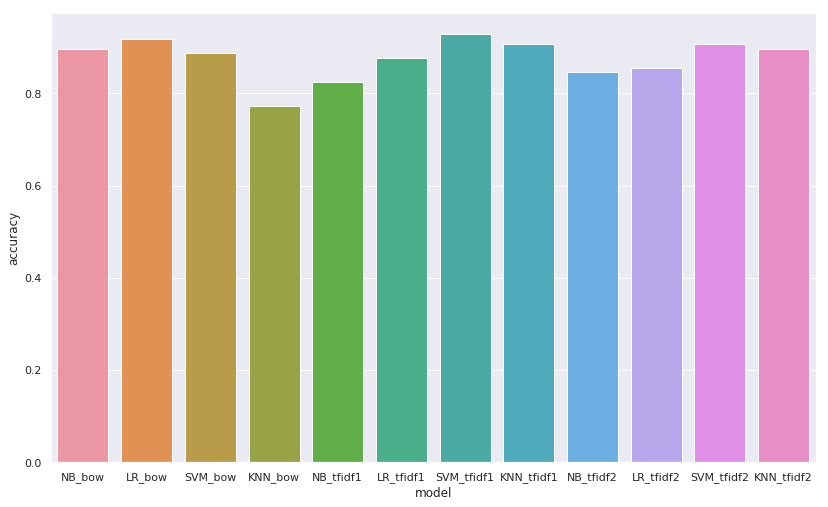

In [215]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
ax = sns.barplot(x="model", y="accuracy", data=grafik)

In [216]:
y_test.value_counts()

0    51
1    46
Name: label, dtype: int64

In [258]:
y_train.value_counts()

0    198
1    188
Name: label, dtype: int64

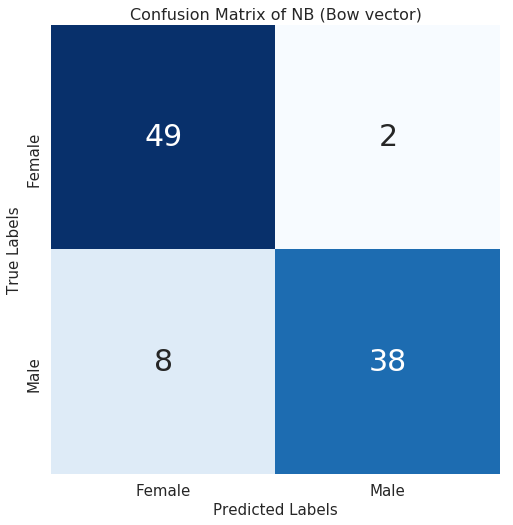

In [245]:
ax = sns.heatmap(cm_bow_nb, square=True, annot=True, annot_kws={"size": 30}, cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix of NB (Bow vector)',fontsize = 16)
ax.xaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
ax.yaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
plt.show()

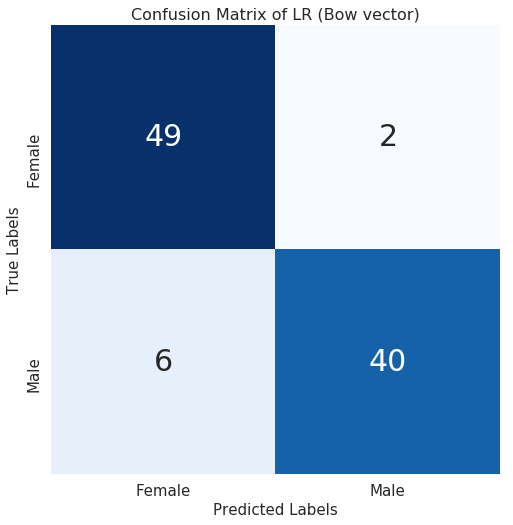

In [246]:
ax = sns.heatmap(cm_bow_lr, square=True, annot=True, annot_kws={"size": 30}, cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix of LR (Bow vector)',fontsize = 16)
ax.xaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
ax.yaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
plt.show()

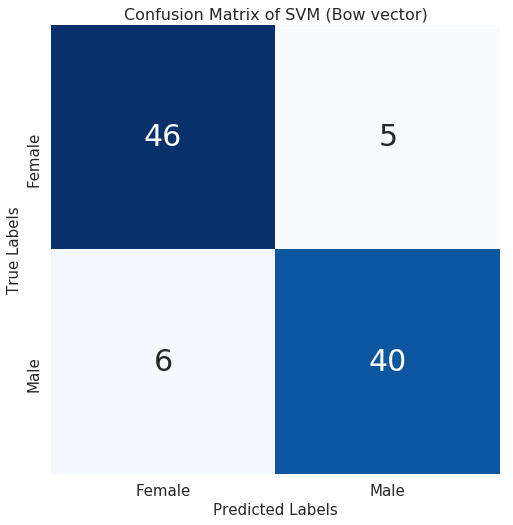

In [247]:
ax = sns.heatmap(cm_bow_svm, square=True, annot=True,annot_kws={"size": 30},  cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix of SVM (Bow vector)',fontsize = 16)
ax.xaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
ax.yaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
plt.show()

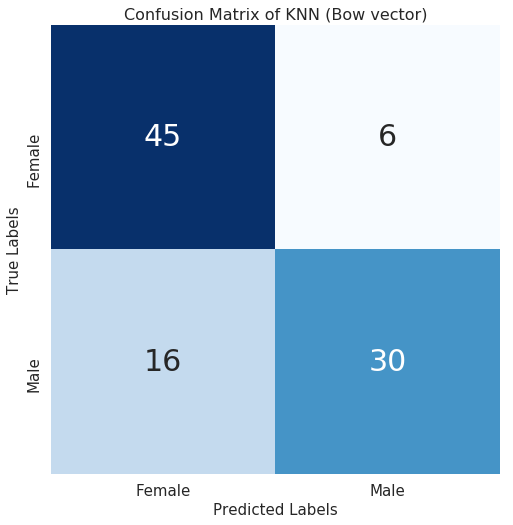

In [248]:
ax = sns.heatmap(cm_bow_knn, square=True, annot=True,annot_kws={"size": 30}, cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix of KNN (Bow vector)',fontsize = 16)
ax.xaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
ax.yaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
plt.show()

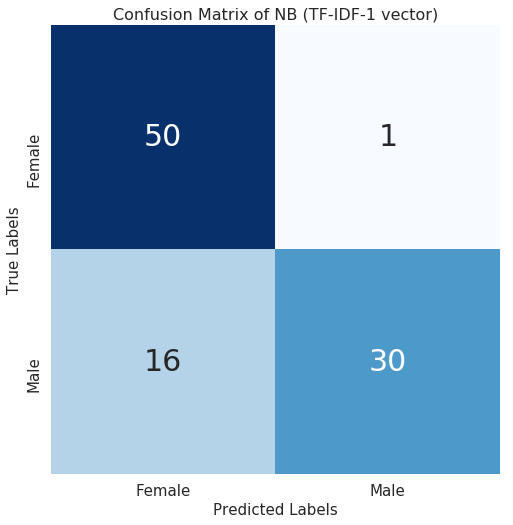

In [249]:
ax = sns.heatmap(cm_tfidf1_nb, square=True, annot=True,annot_kws={"size": 30}, cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix of NB (TF-IDF-1 vector)',fontsize = 16)
ax.xaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
ax.yaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
plt.show()

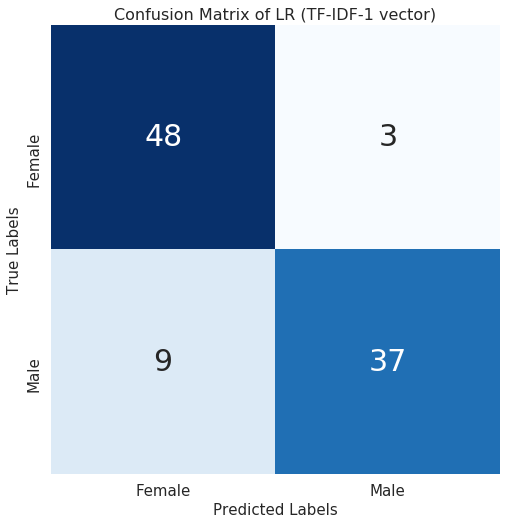

In [250]:
ax = sns.heatmap(cm_tfidf1_lr, square=True, annot=True, annot_kws={"size": 30},cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix of LR (TF-IDF-1 vector)',fontsize = 16)
ax.xaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
ax.yaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
plt.show()

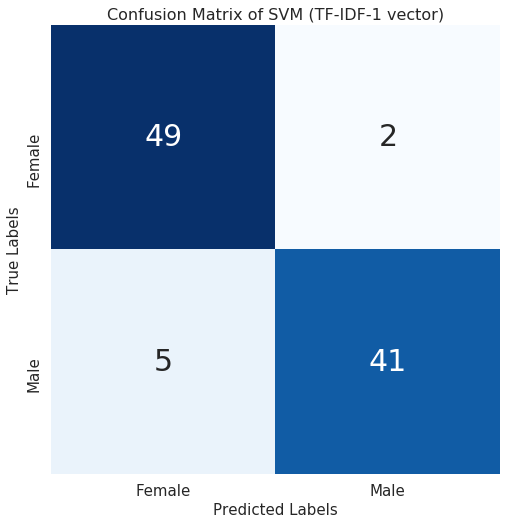

In [251]:
ax = sns.heatmap(cm_tfidf1_svm, square=True, annot=True, annot_kws={"size": 30}, cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix of SVM (TF-IDF-1 vector)',fontsize = 16)
ax.xaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
ax.yaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
plt.show()

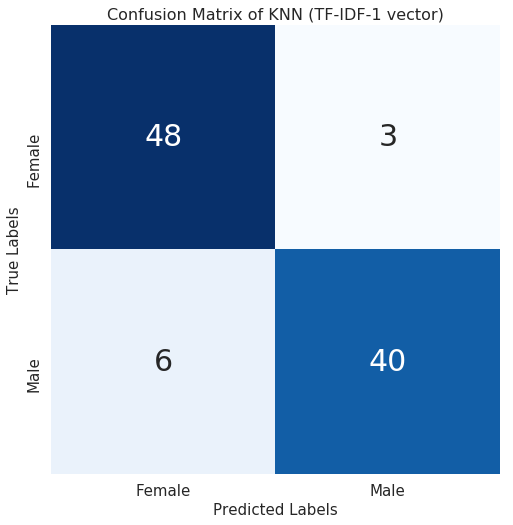

In [252]:
ax = sns.heatmap(cm_tfidf1_knn, square=True, annot=True, annot_kws={"size": 30},cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix of KNN (TF-IDF-1 vector)',fontsize = 16)
ax.xaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
ax.yaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
plt.show()

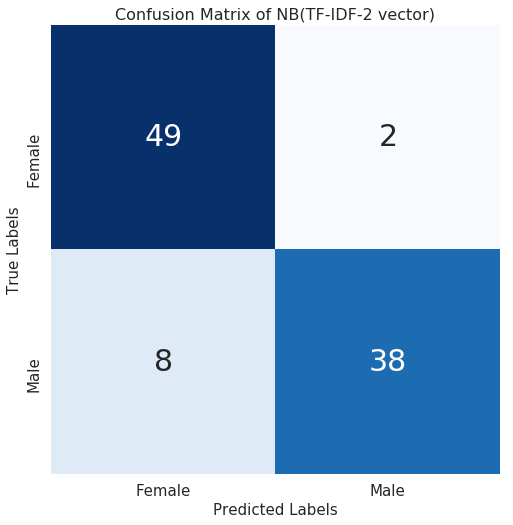

In [253]:
ax = sns.heatmap(cm_tfidf2_nb, square=True, annot=True, annot_kws={"size": 30},cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix of NB(TF-IDF-2 vector)',fontsize = 16)
ax.xaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
ax.yaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
plt.show()

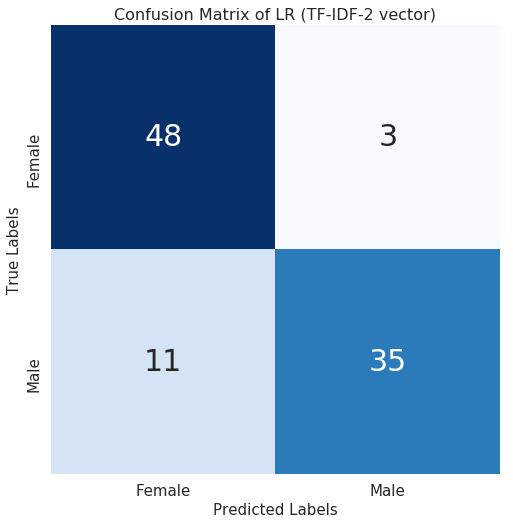

In [254]:
ax = sns.heatmap(cm_tfidf2_lr, square=True, annot=True, annot_kws={"size": 30},cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix of LR (TF-IDF-2 vector)',fontsize = 16)
ax.xaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
ax.yaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
plt.show()

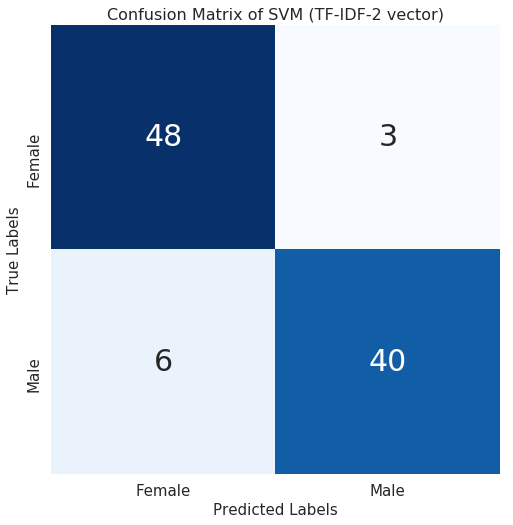

In [255]:
ax = sns.heatmap(cm_tfidf2_svm, square=True, annot=True, annot_kws={"size": 30},cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix of SVM (TF-IDF-2 vector)',fontsize = 16)
ax.xaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
ax.yaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
plt.show()

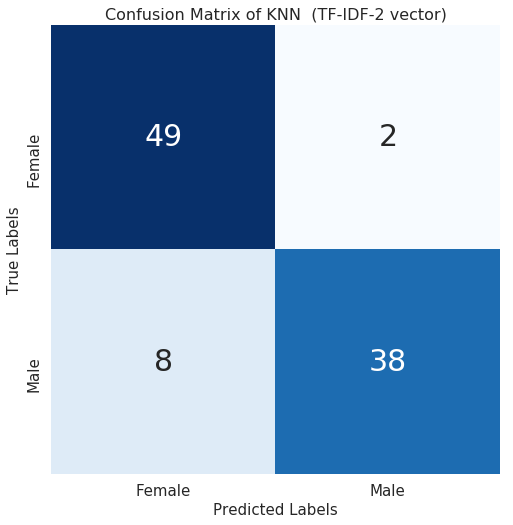

In [256]:
ax = sns.heatmap(cm_tfidf2_knn, square=True, annot=True, annot_kws={"size": 30},cbar=False, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title('Confusion Matrix of KNN  (TF-IDF-2 vector)',fontsize = 16)
ax.xaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
ax.yaxis.set_ticklabels(['Female', 'Male'],fontsize = 15)
plt.show()